<a href="https://colab.research.google.com/github/ydev365/portfolio-for-internship/blob/main/2_%EA%B8%B0%EB%B3%B8_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션3

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 딥러닝 구조의 모델로 분류 모델 생성
    * 최소 4개 이상 모델링 수행
    * 각 모델별 최소 5회 반복수행해서 얻은 성능의 평균으로 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.
* 성능 가이드
    * Accuracy : 0.90 ~ 0.99

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project3 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/AIVLE/AI_미니프로젝트 1차_실습자료/'

### (2) 라이브러리 불러오기

* 라이브러리 로딩
     - pandas, numpy,matplotlib,seaborn, joblib, 모델링에 필요한 라이브러리를 로딩합니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from tqdm import tqdm

import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (3) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
    * data01_test.csv : 테스트용
    * feature.csv : feature 이름을 계층구조로 정리한 데이터

* 세부 요구사항
    * 칼럼 삭제 : data01_train.csv와 data01_test.csv 에서 'subject' 칼럼은 불필요하므로 삭제합니다.

#### 1) 데이터로딩

In [ ]:
# 주어진 데이터 셋을 불러오세요.(3개)
train = pd.read_csv(path + 'data01_train.csv')
test = pd.read_csv(path + 'data01_test.csv')
feature_info = pd.read_csv(path + 'features.csv')

In [ ]:
#불필요한 칼럼을 삭제하세요.

In [ ]:
train = train.drop(columns=['subject'])
test = test.drop(columns=['subject'])

#### 2) 기본 정보 조회

In [ ]:
#전체 데이터의 행,열 개수 확인
print(f'train 데이터: {train.shape[0]}, {train.shape[1]}')
print(f'test 데이터: {test.shape[0]}, {test.shape[1]}')

train 데이터: 5881, 562
test 데이터: 1471, 562


In [ ]:
#전체 데이터의 상위 5개 행 확인
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [ ]:
#전체 데이터의 수치형 변수 분포 확인
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


In [ ]:
#전체 데이터의 모든 변수 확인
train.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [ ]:
# 데이터 분할을 합니다.
X = train.drop(columns=['Activity'])
y = train['Activity']
y

,Activity
0,STANDING
1,LAYING
2,STANDING
3,WALKING
4,WALKING_DOWNSTAIRS
...,...
5876,SITTING
5877,WALKING_UPSTAIRS
5878,LAYING
5879,WALKING_UPSTAIRS


### (2) 스케일링


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [ ]:
#스케일링 방식을 선택해서 스케일링을 진행합니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DataFrame으로 다시 변환 (컬럼명 유지)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### (3) Y 전처리
* integer encoding : LabelEncoder
* (필요시) one-hot encoding

In [ ]:
# 정수 인코딩 변환(LabelEncoder)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
y_onehot = to_categorical(y_encoded)

### (4) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
#데이터 분할 진행(train:val = 8:2 혹은 7:3 권장)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled,
    y_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

## **3. 기본 모델링**



* 세부 요구사항
    - 모델1 : Base line 모델
        * Hidden Layer 없이 모델 생성
    - 모델2 : 복잡한 모델 생성
        * 최소 5개 이상의 은닉층을 추가한 모델
    - 모델3 ~ n : 튜닝 모델
        * 학습률, epoch 등 조정
        * 모델2에 과적합을 방지하기 위한 규제 기법 추가
        * Accuracy 최대화 시키는 모델 생성하기
    - (옵션) 각 모델은 최소 5번 반복수행해서 얻은 성능의 평균값을 기록

### (1) 모델1 : Hidden Layer 없이 모델 생성

In [ ]:
# 클래스 수
n_classes = y_train.shape[1]

# 모델 설계
model1 = Sequential()
model1.add(Dense(n_classes, activation='softmax', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일 및 학습
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 모델 학습
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6299 - loss: 0.8811 - val_accuracy: 0.9074 - val_loss: 0.2826
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9213 - loss: 0.2424 - val_accuracy: 0.9431 - val_loss: 0.1950
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.1627 - val_accuracy: 0.9558 - val_loss: 0.1513
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9625 - loss: 0.1303 - val_accuracy: 0.9618 - val_loss: 0.1288
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9715 - loss: 0.1050 - val_accuracy: 0.9592 - val_loss: 0.1256
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.0905 - val_accuracy: 0.9660 - val_loss: 0.1095
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9733 - loss: 0.0893 - val_accuracy: 0.9703 - val_loss: 0.0952
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9789 - loss: 0.0783 - val_accuracy: 0.

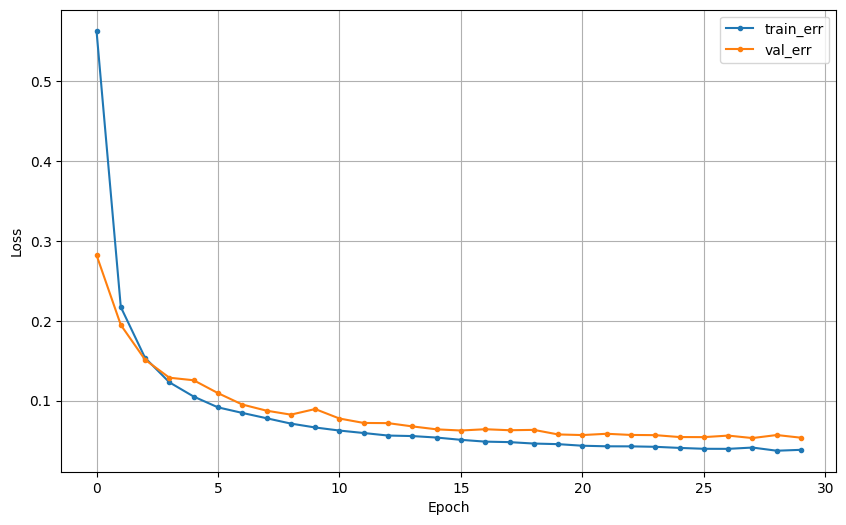

In [ ]:
# 학습곡선
dl_history_plot(history1.history)

In [ ]:
# 모델 예측 확률값
y_pred_proba = model1.predict(X_val)

# 확률 → 클래스 인덱스로 변환
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_val, axis=1)  # 원핫 → 정답 인덱스

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# 정확도
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)
print(classification_report(y_true, y_pred, target_names=le.classes_))

Validation Accuracy: 0.9855564995751912
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.95      0.97      0.96       206
          STANDING       0.98      0.95      0.97       218
           WALKING       1.00      1.00      1.00       200
WALKING_DOWNSTAIRS       0.99      1.00      1.00       158
  WALKING_UPSTAIRS       0.99      0.99      0.99       172

          accuracy                           0.99      1177
         macro avg       0.99      0.99      0.99      1177
      weighted avg       0.99      0.99      0.99      1177



In [ ]:
#(옵션) 모델1번을 최소 5번 반복수행해서 얻은 성능의 평균값을 기록해보자!
val_acc = []

for i in range(5):
    print(f"모델1 반복 학습 {i+1}/5")

    # 모델 정의
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    # 컴파일
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 학습
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        verbose=0)

    # 예측 및 정확도 계산
    y_pred = np.argmax(model.predict(X_val), axis=1)
    y_true = np.argmax(y_val, axis=1)
    acc = accuracy_score(y_true, y_pred)
    val_acc.append(acc)

    print(f"반복 {i+1} 정확도: {acc:.4f}")

# 평균 및 표준편차 출력
print("\n모델1 성능 요약")
print("평균 정확도:", np.mean(val_acc))
print("정확도 표준편차:", np.std(val_acc))


모델1 반복 학습 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
반복 1 정확도: 0.9830
모델1 반복 학습 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
반복 2 정확도: 0.9813
모델1 반복 학습 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
반복 3 정확도: 0.9839
모델1 반복 학습 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
반복 4 정확도: 0.9822
모델1 반복 학습 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
반복 5 정확도: 0.9847

모델1 성능 요약
평균 정확도: 0.9830076465590485
정확도 표준편차: 0.001201540834641538


### (2) 모델2 : 최소 5개 이상의 은닉층을 추가한 모델

In [ ]:
# 모델 설계
n_classes = y_train.shape[1]

model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 학습
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7510 - loss: 0.6562 - val_accuracy: 0.9482 - val_loss: 0.1338
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9534 - loss: 0.1196 - val_accuracy: 0.9414 - val_loss: 0.1300
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9694 - loss: 0.0835 - val_accuracy: 0.9805 - val_loss: 0.0674
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0524 - val_accuracy: 0.9601 - val_loss: 0.0946
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9702 - loss: 0.0762 - val_accuracy: 0.9822 - val_loss: 0.0506
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9861 - loss: 0.0372 - val_accuracy: 0.9745 - val_loss: 0.0730
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9775 - loss: 0.0641 - val_accuracy: 0.9737 - val_loss: 0.0879
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.1152 - val_accuracy: 0.

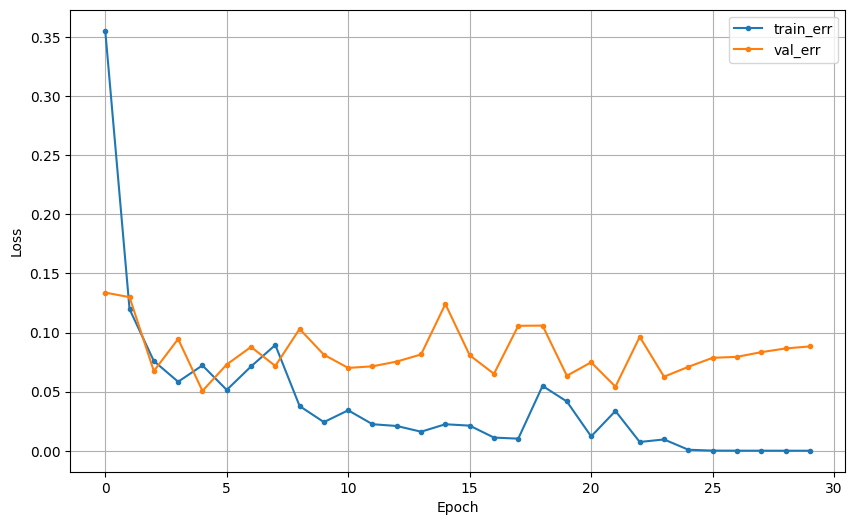

In [ ]:
# 학습곡선
dl_history_plot(history2.history)

In [ ]:
# 예측
y_pred_proba = model2.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)

# 실제 정답
y_true = np.argmax(y_val, axis=1)

# 정확도
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

print(classification_report(y_true, y_pred, target_names=le.classes_))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation Accuracy: 0.983857264231096
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.96      0.95      0.96       206
          STANDING       0.96      0.96      0.96       218
           WALKING       1.00      1.00      1.00       200
WALKING_DOWNSTAIRS       1.00      1.00      1.00       158
  WALKING_UPSTAIRS       0.99      0.99      0.99       172

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177



### (3) 모델3 : 학습률, epoch 등 조정

In [ ]:
# 모델 설계
n_classes = y_train.shape[1]

model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일 (학습률 조정)
model3.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping 설정
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 학습
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)
# 학습 후 종료된 epoch 수
stopped_epoch = early_stop.stopped_epoch
best_epoch = np.argmin(history3.history['val_loss']) + 1

print(f"{stopped_epoch}번째 epoch에서 종료")
print(f"best: {best_epoch}번째 epoch")

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5677 - loss: 1.1407 - val_accuracy: 0.9210 - val_loss: 0.2164
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9442 - loss: 0.1666 - val_accuracy: 0.9601 - val_loss: 0.1142
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9686 - loss: 0.0878 - val_accuracy: 0.9541 - val_loss: 0.1291
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9655 - loss: 0.0907 - val_accuracy: 0.9720 - val_loss: 0.0836
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9811 - loss: 0.0502 - val_accuracy: 0.9703 - val_loss: 0.0751
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9802 - loss: 0.0493 - val_accuracy: 0.9839 - val_loss: 0.0536
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9800 - loss: 0.0563 - val_accuracy: 0.9720 - val_loss: 0.0686
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9824 - loss: 0.0410 - val_accuracy: 0.9822 - val_loss:

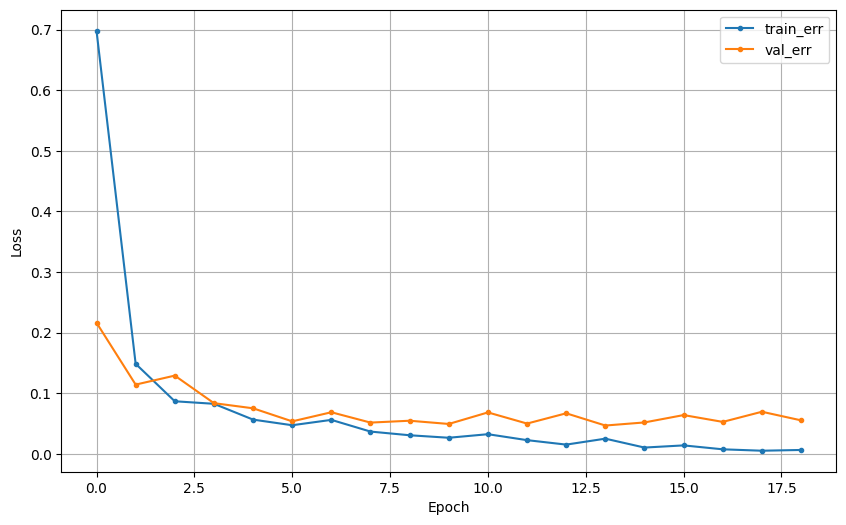

In [ ]:
# 학습곡선
dl_history_plot(history3.history)

In [ ]:
# 예측
y_pred_proba = model3.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)

# 실제 정답
y_true = np.argmax(y_val, axis=1)

# 정확도
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

print(classification_report(y_true, y_pred, target_names=le.classes_))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation Accuracy: 0.983857264231096
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.97      0.95      0.96       206
          STANDING       0.96      0.97      0.97       218
           WALKING       1.00      0.99      1.00       200
WALKING_DOWNSTAIRS       0.99      1.00      1.00       158
  WALKING_UPSTAIRS       0.99      1.00      1.00       172

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177



### (4) 모델4 :  학습률, epoch 등 조정

In [ ]:
# 모델 설계 (dropout 추가)
n_classes = y_train.shape[1]

model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일 (학습률)
model4.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습
history4 = model4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4527 - loss: 1.3149 - val_accuracy: 0.8267 - val_loss: 0.4200
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7879 - loss: 0.5311 - val_accuracy: 0.9176 - val_loss: 0.2357
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8797 - loss: 0.3168 - val_accuracy: 0.9261 - val_loss: 0.1871
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 0.2397 - val_accuracy: 0.9465 - val_loss: 0.1359
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9272 - loss: 0.1948 - val_accuracy: 0.9601 - val_loss: 0.1073
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9394 - loss: 0.1566 - val_accuracy: 0.9626 - val_loss: 0.0999
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9574 - loss: 0.1263 - val_accuracy: 0.9703 - val_loss: 0.0860
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9599 - loss: 0.1081 - val_accuracy: 0.

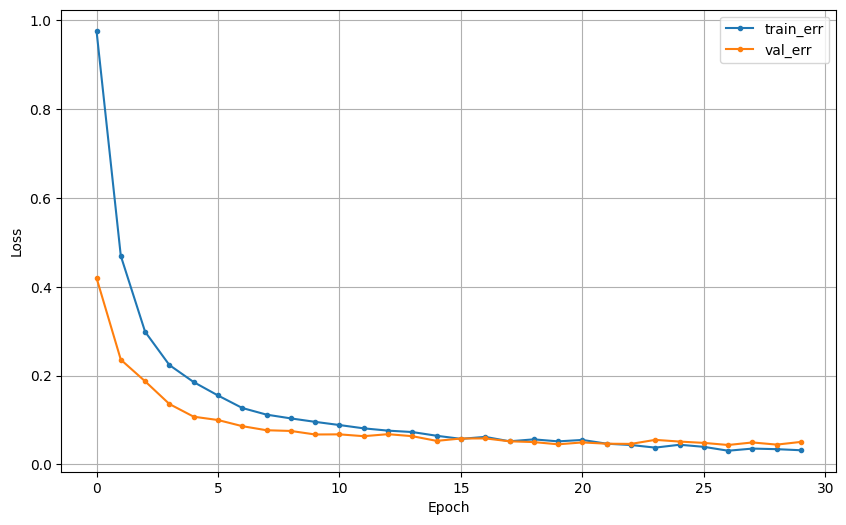

In [ ]:
# 학습곡선
dl_history_plot(history4.history)

In [ ]:
# 예측
y_pred_proba = model4.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)

# 실제 정답
y_true = np.argmax(y_val, axis=1)

# 정확도
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

print(classification_report(y_true, y_pred, target_names=le.classes_))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation Accuracy: 0.9847068819031436
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.95      0.97      0.96       206
          STANDING       0.98      0.95      0.97       218
           WALKING       1.00      1.00      1.00       200
WALKING_DOWNSTAIRS       0.99      1.00      0.99       158
  WALKING_UPSTAIRS       0.99      0.99      0.99       172

          accuracy                           0.98      1177
         macro avg       0.99      0.99      0.99      1177
      weighted avg       0.98      0.98      0.98      1177



## 4.성능비교

* 세부 요구사항
    - test 데이터에 대한 전처리
    - 각 모델에 대해서 test 데이터로 성능 측정

In [ ]:
#전체 데이터 불러오기(test)
test = pd.read_csv(path + 'data01_test.csv')

# subject 삭제
test.drop(columns=['subject'], inplace=True)

In [ ]:
# x, y 분할
X_test = test.drop(columns=['Activity'])
y_test = test['Activity']

# x : 스케일링 적용
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y : 정수인코딩 적용
y_test_encoded = le.transform(y_test)

# 원핫인코딩
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
# 예측
y_test_pred_proba = model4.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test_onehot, axis=1)

# 평가
acc4 = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", acc4)

print(classification_report(y_test_true, y_test_pred, target_names=le.classes_))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.9714479945615228
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       292
           SITTING       0.90      0.95      0.93       254
          STANDING       0.96      0.91      0.93       287
           WALKING       1.00      0.99      0.99       228
WALKING_DOWNSTAIRS       0.99      1.00      1.00       195
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [ ]:
# 예측 및 정답 변환 함수
def get_test_accuracy(model, X_test_scaled, y_test_onehot):
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test_onehot, axis=1)
    return accuracy_score(y_true, y_pred)

In [ ]:
acc1 = get_test_accuracy(model1, X_test_scaled, y_test_onehot)
acc2 = get_test_accuracy(model2, X_test_scaled, y_test_onehot)
acc3 = get_test_accuracy(model3, X_test_scaled, y_test_onehot)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
model_scores = {
    'Model 1 ': acc1,
    'Model 2 ': acc2,
    'Model 3 ': acc3,
    'Model 4 ': acc4
}

score_df = pd.DataFrame(model_scores, index=['Accuracy']).T
score_df = score_df.sort_values(by='Accuracy', ascending=False)

for name, row in score_df.iterrows():
    print(f"✅ {name} 정확도: {row['Accuracy']:.4f}")

✅ Model 2  정확도: 0.9816
✅ Model 3  정확도: 0.9776
✅ Model 4  정확도: 0.9714
✅ Model 1  정확도: 0.9708


#### 고생하셨습니다! 이제 단계적 모델링을 해봅시다.